### **PCOS or polycystic ovary syndrome :**
 PCOS is a hormonal imbalance that affects ovulation. This can cause irregular periods, excess androgen, and cysts in the ovaries. It's a common condition, affecting about 1 in 10 women of childbearing age.

 PCOS Dataset Source : https://www.kaggle.com/datasets/cm037divya/pcos-dataset


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing libraries**

In [82]:
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pickle

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import  linear_model

In [3]:
shutil.copytree("/content/drive/MyDrive/PCOS","/content/PCOS")

'/content/PCOS'

# **Reading the dataset using pandas**

In [4]:
dataset = pd.read_csv("/content/PCOS/PCOS_extended_dataset.csv")

# **Analysis of Dataset**

In [5]:
dataset.head(10)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,193,193,0,30,69.979147,167.708055,23.185569,12,72,22,...,1,0.0,1,105.483401,76.096379,2,4,10.0,13.0,6.176029
1,360,360,0,36,63.711688,154.055877,25.441392,13,70,18,...,1,0.0,1,115.883740,79.117243,2,3,13.0,11.0,6.824718
2,10,10,0,36,51.848631,149.059804,23.928264,15,80,20,...,0,0.0,0,112.219711,80.919417,1,1,14.0,17.0,2.568691
3,278,278,1,29,66.893988,148.628036,27.894935,15,72,18,...,0,0.0,1,104.619624,69.902681,1,1,12.0,14.0,9.962732
4,71,71,0,33,52.536198,150.767409,23.079564,13,72,18,...,0,0.0,0,99.175454,70.330461,5,2,11.5,4.7,6.655190
5,473,473,1,26,67.408647,165.951097,25.582907,11,72,18,...,1,1.0,0,104.534763,67.877522,12,14,19.0,18.0,9.346737
6,397,397,0,31,68.703324,159.593469,27.318412,15,72,18,...,1,0.0,0,104.686254,78.572280,4,9,12.0,15.0,6.737614
7,315,315,1,34,52.659470,157.495627,21.512464,11,78,20,...,1,1.0,0,122.344192,81.485462,5,5,12.0,10.0,11.596253
8,487,487,1,30,49.764163,158.961647,19.116393,11,74,18,...,0,1.0,1,112.984942,83.469785,16,16,19.0,19.0,10.648025
9,88,88,0,40,57.576129,156.596777,23.227606,11,80,20,...,0,0.0,0,121.756683,72.242461,11,9,17.0,18.0,4.693380


In [6]:
dataset.tail(10)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
1990,530,530,0,32,54.052745,162.314058,19.853309,13,70,24,...,0,1.0,0,114.754250,77.401745,3,1,18.0,17.0,7.803013
1991,498,498,0,35,54.029293,139.524876,26.760555,11,72,20,...,1,0.0,0,109.983718,72.166343,9,7,20.0,16.0,6.874530
1992,432,432,0,42,66.939336,158.197020,26.519736,11,72,18,...,1,1.0,0,108.856965,68.891713,5,7,14.0,15.0,7.660459
1993,529,529,0,41,57.885620,146.285267,27.243001,13,72,20,...,0,1.0,0,124.190984,81.358184,1,0,19.0,14.0,10.634437
1994,63,63,0,24,62.777501,168.557998,20.471915,15,70,20,...,0,0.0,0,123.278444,82.513818,3,5,12.0,13.5,8.684718
1995,87,87,0,31,66.948922,155.976858,26.662263,15,74,18,...,0,0.0,0,120.323951,83.738573,8,10,15.0,13.0,9.816150
1996,508,508,0,37,64.592788,151.979792,27.681715,11,74,20,...,0,1.0,0,109.738395,76.083303,6,6,19.0,19.0,7.930382
1997,166,166,0,32,47.750129,148.596447,20.041406,11,73,26,...,1,1.0,0,109.570220,61.778231,5,5,14.0,13.0,6.832224
1998,266,266,0,40,31.869660,152.589988,13.793101,15,72,20,...,0,1.0,1,119.456176,79.410616,6,5,18.0,17.0,7.636086
1999,89,89,1,22,70.206568,167.852724,24.791898,13,74,20,...,0,0.0,0,108.275182,76.251829,10,13,15.0,16.0,9.950989


# **Getting the dimension of dataset**

In [7]:
rows = dataset.shape[0]
columns = dataset.shape[1]
print("There are",rows,"rows and",columns,"Columns in dataset")

There are 2000 rows and 44 Columns in dataset


# **Getting metadata about data (Datatype of column and count of non-null values)**

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  2000 non-null   int64  
 1   Patient File No.        2000 non-null   int64  
 2   PCOS (Y/N)              2000 non-null   int64  
 3    Age (yrs)              2000 non-null   int64  
 4   Weight (Kg)             2000 non-null   float64
 5   Height(Cm)              2000 non-null   float64
 6   BMI                     2000 non-null   float64
 7   Blood Group             2000 non-null   int64  
 8   Pulse rate(bpm)         2000 non-null   int64  
 9   RR (breaths/min)        2000 non-null   int64  
 10  Hb(g/dl)                2000 non-null   float64
 11  Cycle(R/I)              2000 non-null   int64  
 12  Cycle length(days)      2000 non-null   int64  
 13  Marraige Status (Yrs)   1997 non-null   float64
 14  Pregnant(Y/N)           2000 non-null   

# **Getting summary statistics of dataset**

In [9]:
dataset.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000
mean,266.633000,266.633000,0.304000,31.35400,59.527068,156.416496,24.284184,13.788000,73.241000,19.232000,...,0.477000,0.517000,0.257500,114.701590,76.989127,6.09000,6.50350,14.879300,15.410320,8.571637
std,154.058467,154.058467,0.460098,5.44982,11.445212,6.044243,4.132187,1.832958,4.098941,1.740601,...,0.499596,0.499836,0.437366,7.564600,6.085313,4.23094,4.37362,3.641161,3.270965,2.217999
min,1.000000,1.000000,0.000000,20.00000,30.739215,136.539081,11.939138,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,11.525778,7.680842,0.00000,0.00000,0.000000,0.000000,0.000000
25%,132.000000,132.000000,0.000000,28.00000,52.248684,152.169130,21.765743,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,109.564746,72.433707,3.00000,3.00000,13.000000,13.000000,7.099641
50%,267.000000,267.000000,0.000000,31.00000,58.538632,156.433674,24.188981,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,114.558163,78.340745,5.00000,6.00000,15.000000,16.000000,8.434753
75%,395.000000,395.000000,1.000000,35.00000,65.519518,160.064790,26.600461,15.000000,74.000000,20.000000,...,1.000000,1.000000,1.000000,120.190386,81.186301,8.25000,9.00000,18.000000,18.000000,9.876932
max,541.000000,541.000000,1.000000,48.00000,113.379053,180.388539,40.449415,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,144.980616,104.267012,22.00000,20.00000,24.000000,24.000000,18.675452


# **Printing the columns name of dataset**

In [10]:
print(dataset.columns)

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


# **Cleaning**

In [11]:
dataset_1 = dataset.drop(['Sl. No', 'Patient File No.','Weight (Kg)','Height(Cm) ','Hip(inch)', 'Waist(inch)','Marraige Status (Yrs)'], axis=1)

# **The code drops several columns from the dataset :**

* **Serial Number ("Sl. No")**: Not relevant to PCOS prediction.
* **Patient File Number**: Likely an identifier and not useful for analysis.
* **Weight and Height**: Derivable from the Body Mass Index (BMI) if needed.
* **Hip and Waist (individually)**: Already captured in the hip-to-waist ratio.
* **Marital Status**: No established link between marital status and PCOS.


# **Attributes of Dataset**

1. **PCOS (Y/N)** - Yes (Y) or No (N) indicates presence of Polycystic Ovary Syndrome, a hormonal imbalance affecting ovulation and menstruation.

2. **Age (yrs)** - Your current age in years.

3. **BMI** - Body Mass Index, a measure of weight relative to height, used to screen for potential weight-related health problems.

4. **Blood Group** - A, B, AB, or O blood type, a genetic classification of your blood based on surface molecules.

                      A+ = 11
                      A- = 12
                      B+ = 13
                      B- = 14
                      O+ = 15
                      O- = 16
                      AB+ = 17
                      AB- = 18

5. **Pulse rate(bpm)** - The number of times your heart beats per minute, an indicator of heart function.

6. **RR (breaths/min)** - Respiratory Rate, the number of breaths you take per minute, an indicator of respiratory function.

7. **Hb(g/dl)** - Hemoglobin concentration in your blood, carrying oxygen to your tissues. Lower levels may indicate anemia.

8. **Cycle(R/I)** - Regular (R) or Irregular (I) menstrual cycle.

9. **Cycle length(days)** - Average number of days in your menstrual cycle, important for tracking ovulation and fertility.

10. **Pregnant(Y/N)** - Yes (Y) or No (N) indicating pregnancy status.

11. **No. of abortions** - Number of prior pregnancy terminations, which may influence future fertility.

12. **I beta-HCG(mIU/mL)** - Beta-human chorionic gonadotropin level in the first trimester of pregnancy, a hormone produced by the developing placenta.

13. **II beta-HCG(mIU/mL)** - Beta-human chorionic gonadotropin level in the second trimester of pregnancy, used to monitor fetal development.

14. **FSH(mIU/mL)** - Follicle Stimulating Hormone level, a hormone involved in egg maturation.

15. **LH(mIU/mL)** - Luteinizing Hormone level, a hormone involved in ovulation and egg release.

16. **FSH/LH** - Ratio of FSH to LH levels, which can indicate ovulation problems.

17. **Waist:Hip Ratio** - Ratio of your waist circumference to hip circumference, a body fat distribution measure.

18. **TSH (mIU/L)** - Thyroid Stimulating Hormone level, a hormone regulating your thyroid function and metabolism.

19. **AMH(ng/mL)** - Anti-Müllerian Hormone level, an indicator of remaining eggs in your ovaries and potential fertility.

20. **PRL(ng/mL)** - Prolactin level, a hormone involved in milk production and can affect ovulation.

21. **Vit D3 (ng/mL)** - Vitamin D3 level, important for bone health and may influence fertility.

22. **PRG(ng/mL)** - Progesterone level, a hormone involved in preparing the uterus for pregnancy.

23. **RBS(mg/dl)** - Random Blood Sugar level, a snapshot of your blood sugar at a particular time.

24. **Weight gain(Y/N)** - Yes (Y) or No (N) indicating recent weight gain, which can affect hormone levels and fertility.

25. **hair growth(Y/N)** - Yes (Y) or No (N) indicating excessive hair growth, a potential symptom of PCOS.

26. **Skin darkening (Y/N)** - Yes (Y) or No (N) indicating skin darkening, a potential symptom of hormonal imbalance.

27. **Hair loss(Y/N)** - Yes (Y) or No (N) indicating hair loss, which can be caused by hormonal imbalances.

28. **Pimples(Y/N)** - Yes (Y) or No (N) indicating presence of pimples, a potential symptom of hormonal imbalance.

29. **Fast food (Y/N)** - Yes (Y) or No (N) indicating frequent fast food consumption, which can affect hormone regulation.

30. **Reg.Exercise(Y/N)** - Yes (Y) or No (N) indicating regular exercise routine, which can improve hormonal health.

31. **BP _Systolic (mmHg)** - Systolic blood pressure reading, the top number indicating pressure when your heart beats.

32. **BP _Diastolic (mmHg)** - Diastolic blood pressure reading, the bottom number indicating pressure between heartbeats.

33. **Follicle No. (L)** - Number of follicles on the left ovary, small fluid-filled sacs containing eggs.

34. **Follicle No. (R)** - Number of follicles on the right ovary.

35. **Avg. F size (L) (mm)** - Average size of follicles on the left ovary in millimeters, used to monitor egg development.

36. **Avg. F size (R) (mm)** - Average size of follicles on the right ovary in millimeters, used to monitor egg development.

37. **Endometrium (mm)** - Thickness of the uterine lining in millimeters, which prepares for pregnancy and sheds during menstruation.

# **Checking for NA Values**

In [12]:
dataset_1.isna().sum()

PCOS (Y/N)                0
 Age (yrs)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)      0
Follicle No. (L)          0
Follicle No. (R)          0
Avg. F size (L) (mm)      0
Avg. F size (R) (mm)

# **Updating column datatypes from object to float**

In [13]:
for col in dataset_1:
    if dataset_1[col].dtypes == object:
      dataset_1[col] = pd.to_numeric(dataset_1[col], errors = "coerce") # The errors="coerce" parameter instructs pandas to convert any values that cannot be converted to numeric to NaN

# **Select all columns except the first ('PCOS(Y/N)') as it represents the target variable**

In [14]:
columns = dataset_1.columns[1:]

# **Create a grid of boxplots to visually inspect the distribution of each feature (excluding target) and identify potential outliers.**

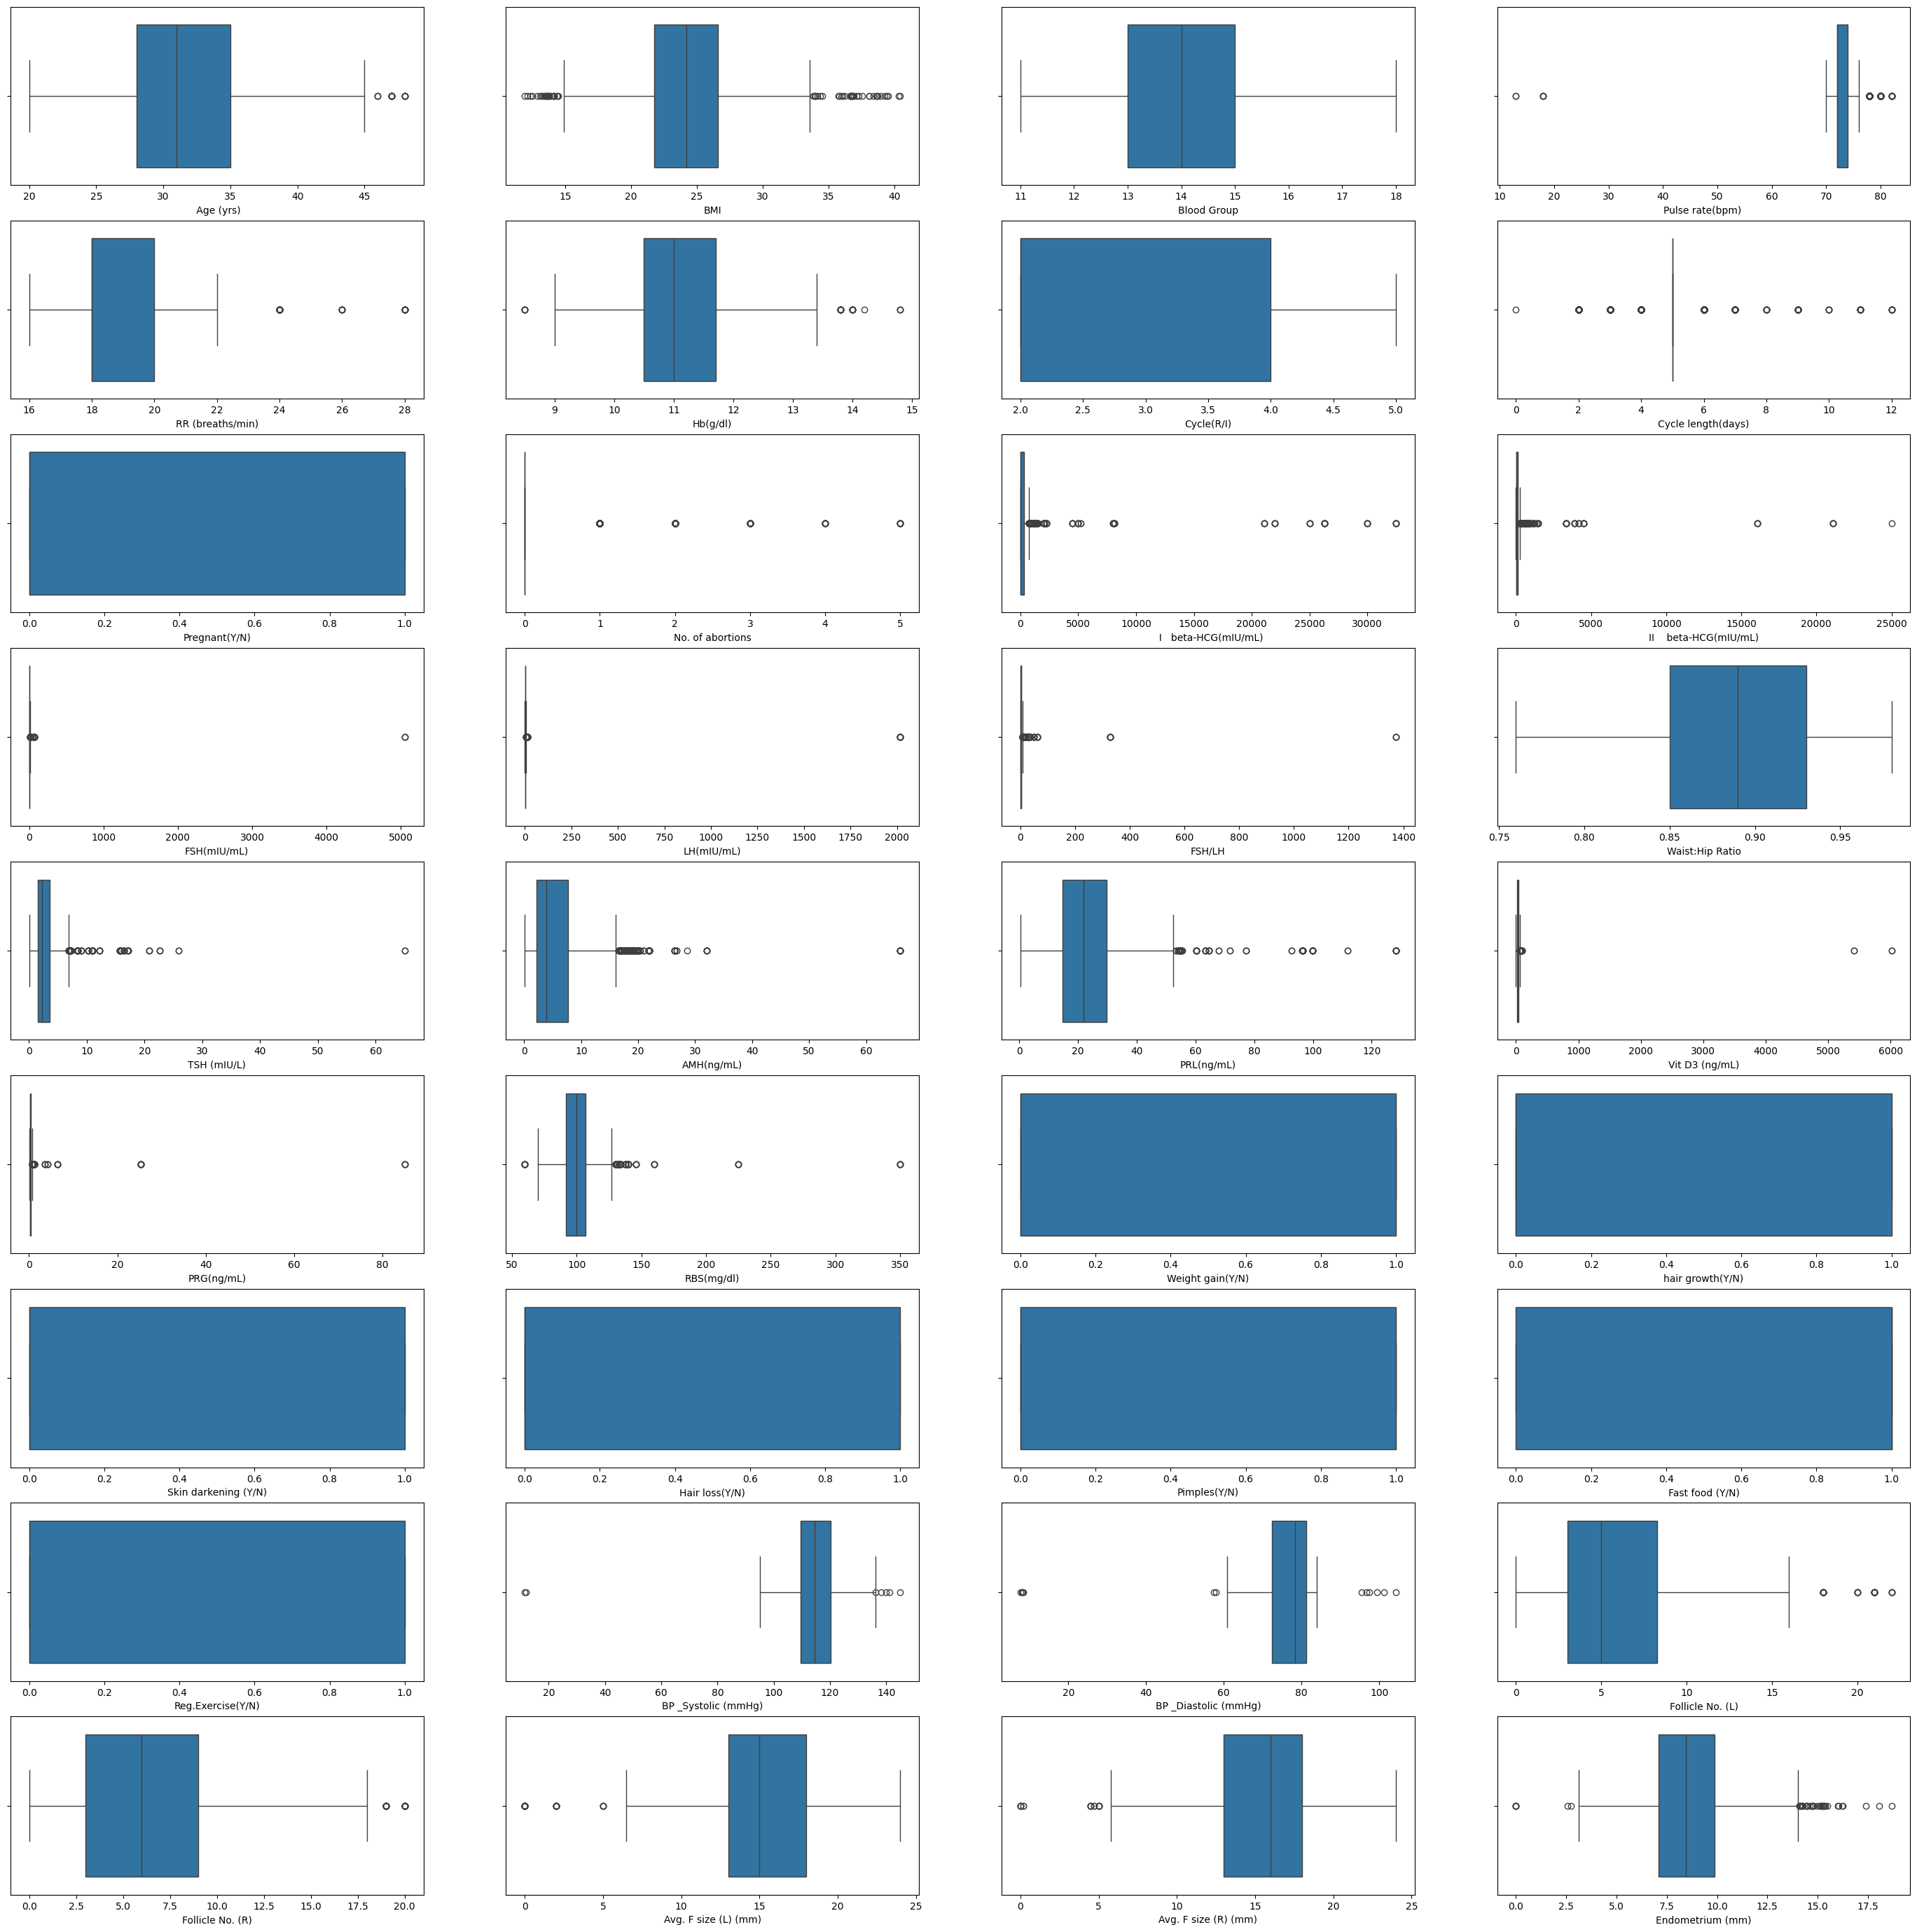

In [15]:
plt.figure(figsize = (35,35))
for i, col in enumerate(columns):
    plt.subplot(9, 4, i+1)
    sns.boxplot(x = dataset_1[col])
plt.show()

# **Calculate pairwise correlation coefficients**

In [16]:
correlation = dataset_1.corr()
correlation

,PCOS (Y/N),Age (yrs),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Pregnant(Y/N),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
PCOS (Y/N),1.000000,-0.182594,0.204274,0.027818,0.082620,0.059307,0.126089,0.398291,-0.176765,-0.013319,...,0.278531,0.384289,0.068214,-0.026886,0.047691,0.599351,0.634140,0.122394,0.106656,0.066357
Age (yrs),-0.182594,1.000000,0.064021,-0.037604,0.064100,0.104087,-0.047007,-0.081542,0.034099,-0.018156,...,-0.015565,-0.022044,0.010639,0.097963,0.075672,-0.111921,-0.149379,-0.025788,-0.060749,-0.106730
BMI,0.204274,0.064021,1.000000,0.066547,0.069783,0.067777,0.015087,0.223032,0.002497,-0.071018,...,0.055549,0.169270,-0.090686,0.038572,0.118172,0.126573,0.095376,-0.037461,-0.131717,-0.020229
Blood Group,0.027818,-0.037604,0.066547,1.000000,0.059138,-0.016249,0.013895,0.138883,-0.014323,-0.109670,...,0.027450,-0.073599,0.071249,0.012144,0.064328,0.046906,0.021496,-0.038300,-0.015673,-0.014518
Pulse rate(bpm),0.082620,0.064100,0.069783,0.059138,1.000000,0.323527,-0.040158,0.128165,-0.023570,0.074631,...,0.002464,0.058309,-0.075932,-0.045281,-0.006933,0.048276,0.036926,-0.046497,-0.046107,-0.053362
RR (breaths/min),0.059307,0.104087,0.067777,-0.016249,0.323527,1.000000,-0.025409,0.036406,-0.023484,0.041396,...,0.045257,0.164512,-0.055513,0.001088,0.048719,0.073922,0.020330,-0.028983,-0.030853,-0.057668
Hb(g/dl),0.126089,-0.047007,0.015087,0.013895,-0.040158,-0.025409,1.000000,0.052699,-0.039538,-0.067366,...,0.072126,0.101361,0.013968,0.058246,0.018814,0.101695,0.117927,0.012874,0.019329,-0.056862
Cycle(R/I),0.398291,-0.081542,0.223032,0.138883,0.128165,0.036406,0.052699,1.000000,-0.178350,-0.081810,...,0.136539,0.208758,0.005430,0.021400,0.077227,0.286910,0.258383,0.021261,0.023832,0.010308
Cycle length(days),-0.176765,0.034099,0.002497,-0.014323,-0.023570,-0.023484,-0.039538,-0.178350,1.000000,0.028213,...,-0.044178,-0.100298,0.022643,-0.030069,-0.115685,-0.088437,-0.162678,-0.025055,-0.007494,-0.042415
Pregnant(Y/N),-0.013319,-0.018156,-0.071018,-0.109670,0.074631,0.041396,-0.067366,-0.081810,0.028213,1.000000,...,0.125812,0.064945,-0.090566,0.002170,0.006400,0.057267,0.050102,-0.120119,-0.153660,-0.028216


# **Generate a heatmap of the correlation matrix with annotations**

<Axes: >

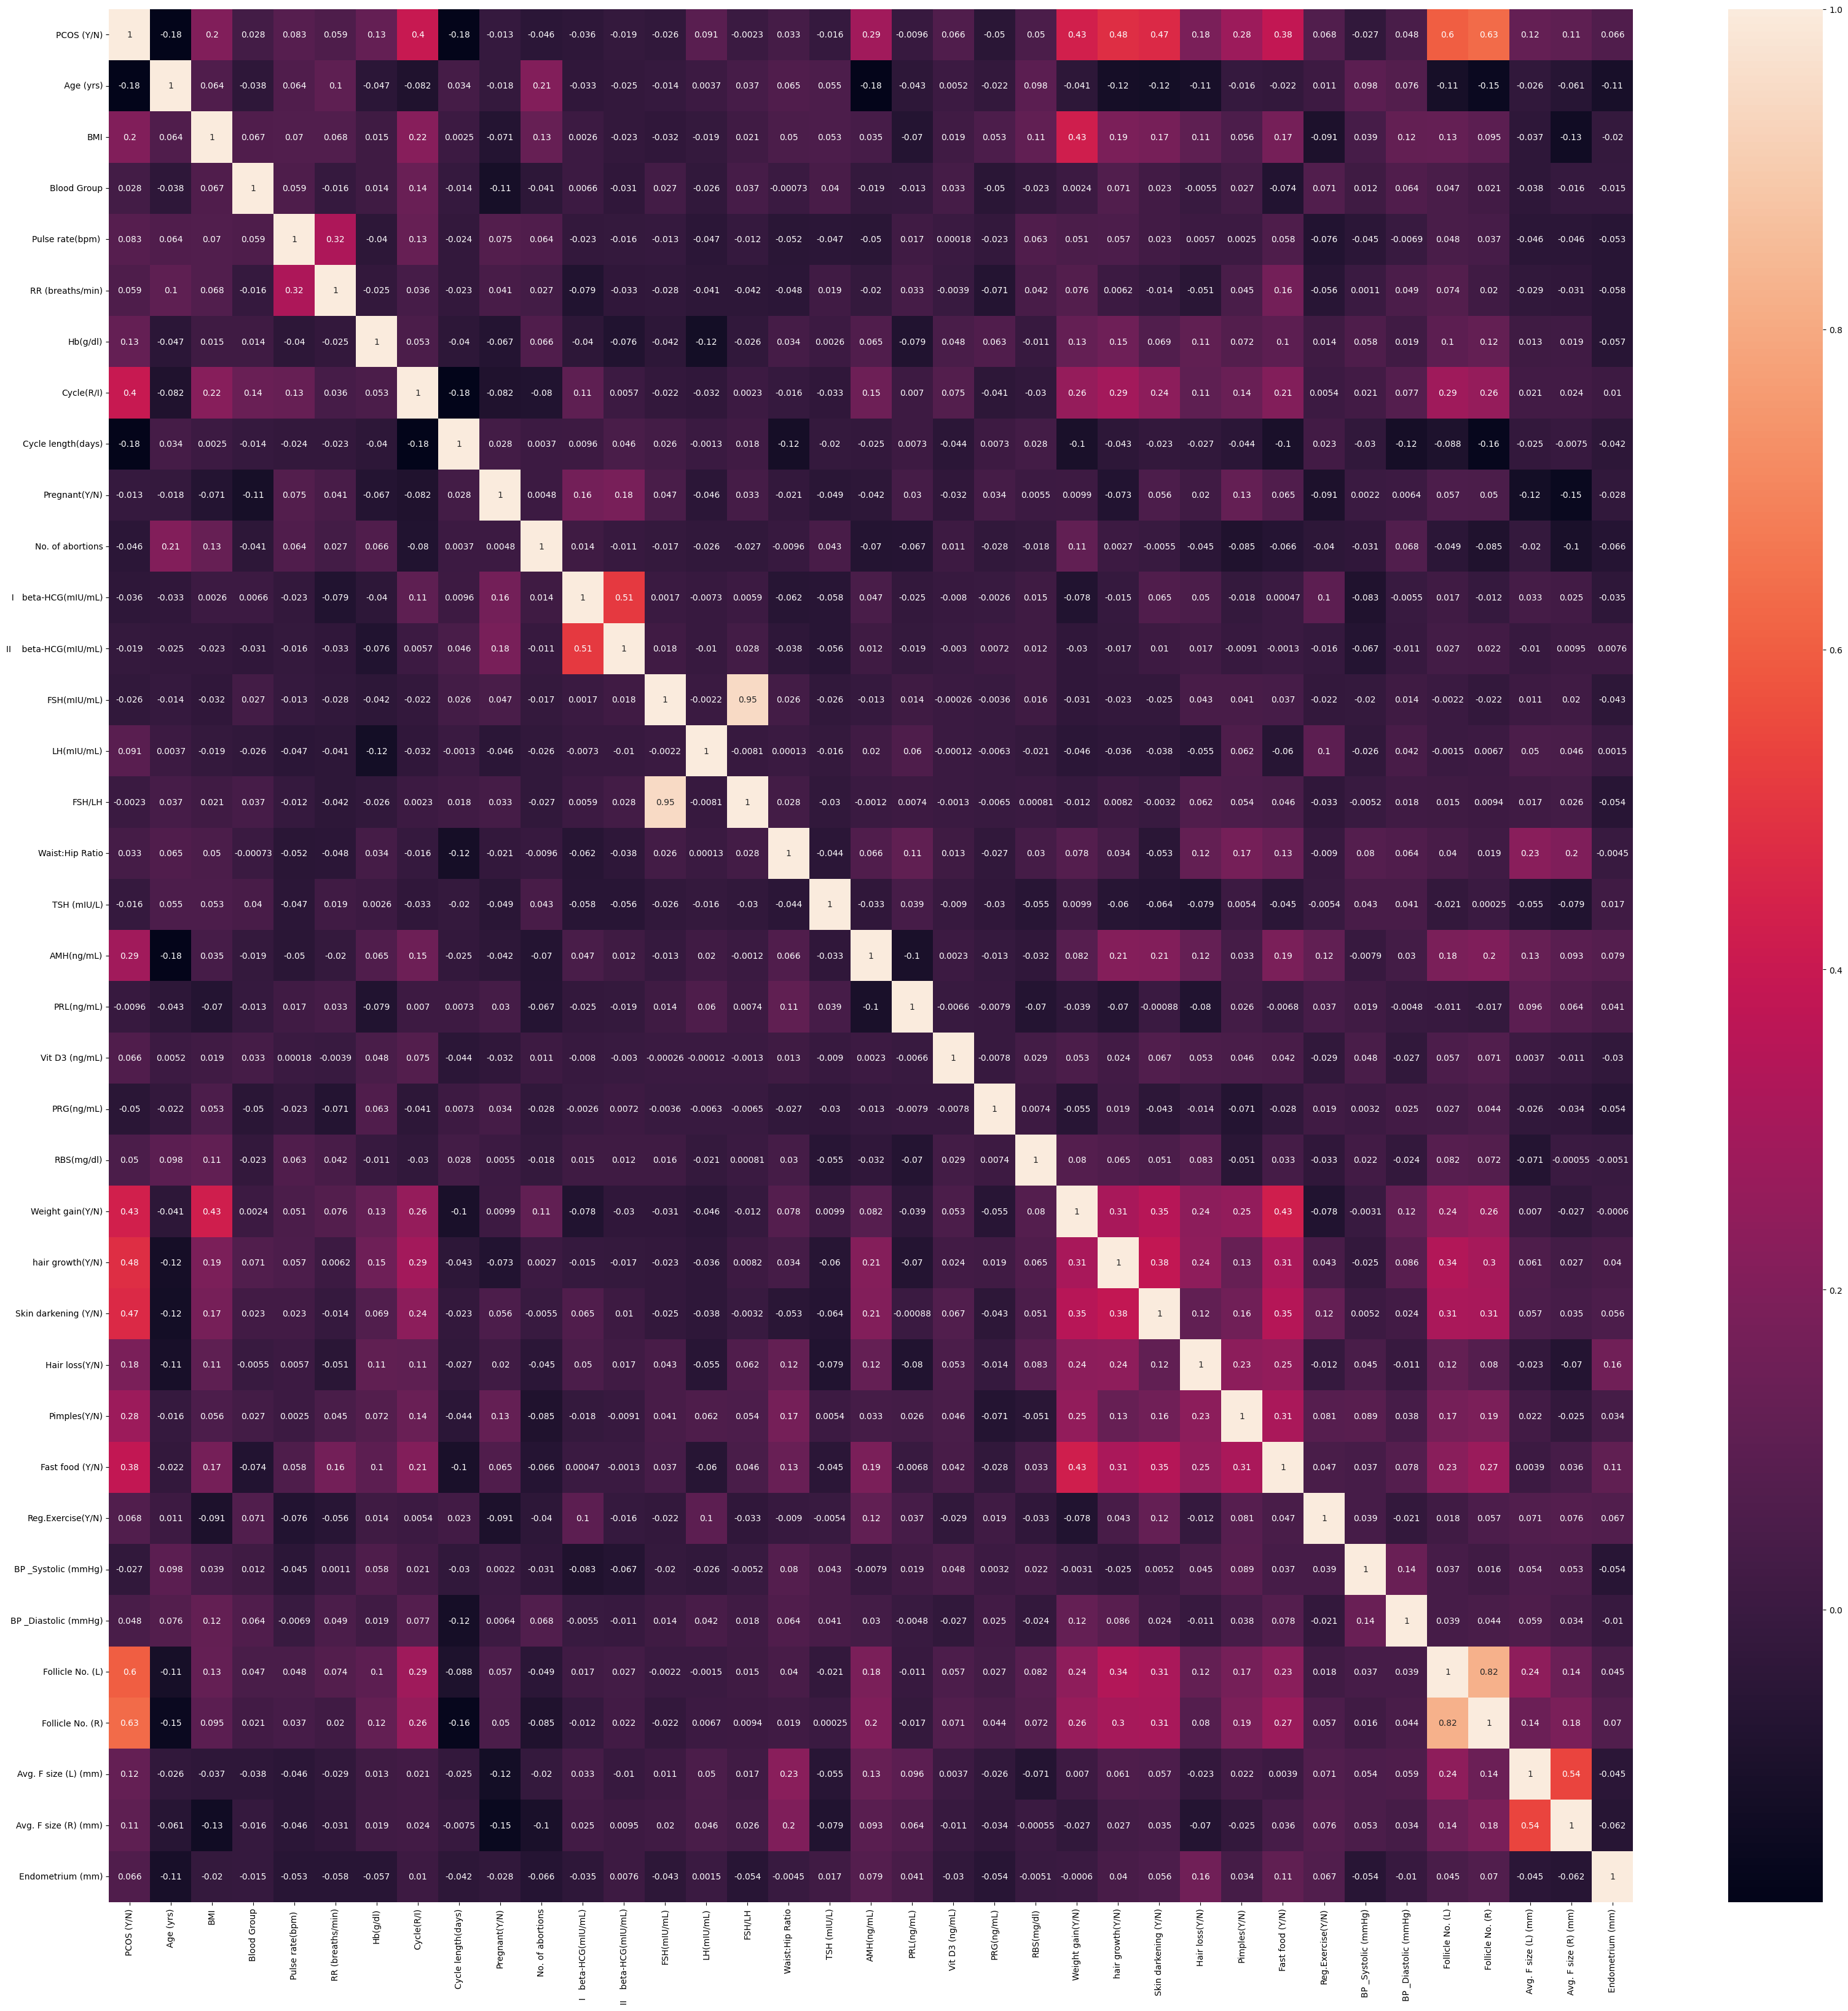

In [17]:
plt.figure(figsize = (40,40))
sns.heatmap(correlation, annot=True)   # it's a 37x37 correlation matrix,

# **Removing the outliers from the dataset**

In [18]:
outliers_columns = ['Pulse rate(bpm) ','FSH(mIU/mL)','LH(mIU/mL)','FSH/LH','TSH (mIU/L)','Vit D3 (ng/mL)','BP _Systolic (mmHg)','BP _Diastolic (mmHg)','Endometrium (mm)']
lower_range = [60,0,0.05,0.39,0.4,5,80,50,1]
upper_range = [100,4000,30,17,7,90,145,105,19]

###   <br> <tab> Outliers Ranges
* 'FSH/LH' normally between 1 and 2 , pcos case: 1:3 or more so taking between 0.39 to 17
* upper wishker range of TSH (mIU/L) comes to be nearly 6.84 roundoff to 7
* AMH(ng/mL) range 2to 6.8 but Lower numbers (less than 1 ng/mL) may indicate a woman with diminished ovarian reserve (DOR).
<br>
<img src='https://drive.google.com/uc?id=1f3TD8DjB4qhB4pfkE7ba9fi8HtPFi16L'>
<br>
* vit D3 Levels of 50 nmol/L (20 ng/mL) or above are adequate for most people for bone and overall health. Levels below 30 nmol/L (12 ng/mL) are too low and might weaken your bones and affect your health. Levels above 125 nmol/L (50 ng/mL) are too high and might cause health problems.


In [19]:
outliers_df = pd.DataFrame({'Columns': outliers_columns, 'Lower Range': lower_range, 'Upper Range': upper_range})
print(outliers_df.to_string())

                Columns  Lower Range  Upper Range
0      Pulse rate(bpm)         60.00          100
1           FSH(mIU/mL)         0.00         4000
2            LH(mIU/mL)         0.05           30
3                FSH/LH         0.39           17
4           TSH (mIU/L)         0.40            7
5        Vit D3 (ng/mL)         5.00           90
6   BP _Systolic (mmHg)        80.00          145
7  BP _Diastolic (mmHg)        50.00          105
8      Endometrium (mm)         1.00           19


In [20]:
def get_outliers_index(data, lower, upper):
  store=[]
  for i in range(len(data)):
    if (data[i]>upper or data[i]<lower):
      store.append(i)
  return store

In [21]:
outlier_index=[]
for i in range(len(outliers_columns)):
  data=outliers_columns[i]
  lower=lower_range[i]
  upper=upper_range[i]
  indexes=get_outliers_index(dataset_1[data], lower, upper)
  for j in indexes:
    if j not in outlier_index:
      outlier_index.append(j)

print("Total number of Outliers found : ", len(outlier_index))

Total number of Outliers found :  184


In [22]:
Cleaned_Dataset = dataset_1.drop(outlier_index)

#**Cleaned Dataset**

In [23]:
rows = Cleaned_Dataset.shape[0]
columns = Cleaned_Dataset.shape[1]
print("There are", rows, "rows and", columns, "Columns in Cleaned Dataset")

There are 1816 rows and 37 Columns in Cleaned Dataset


<Axes: >

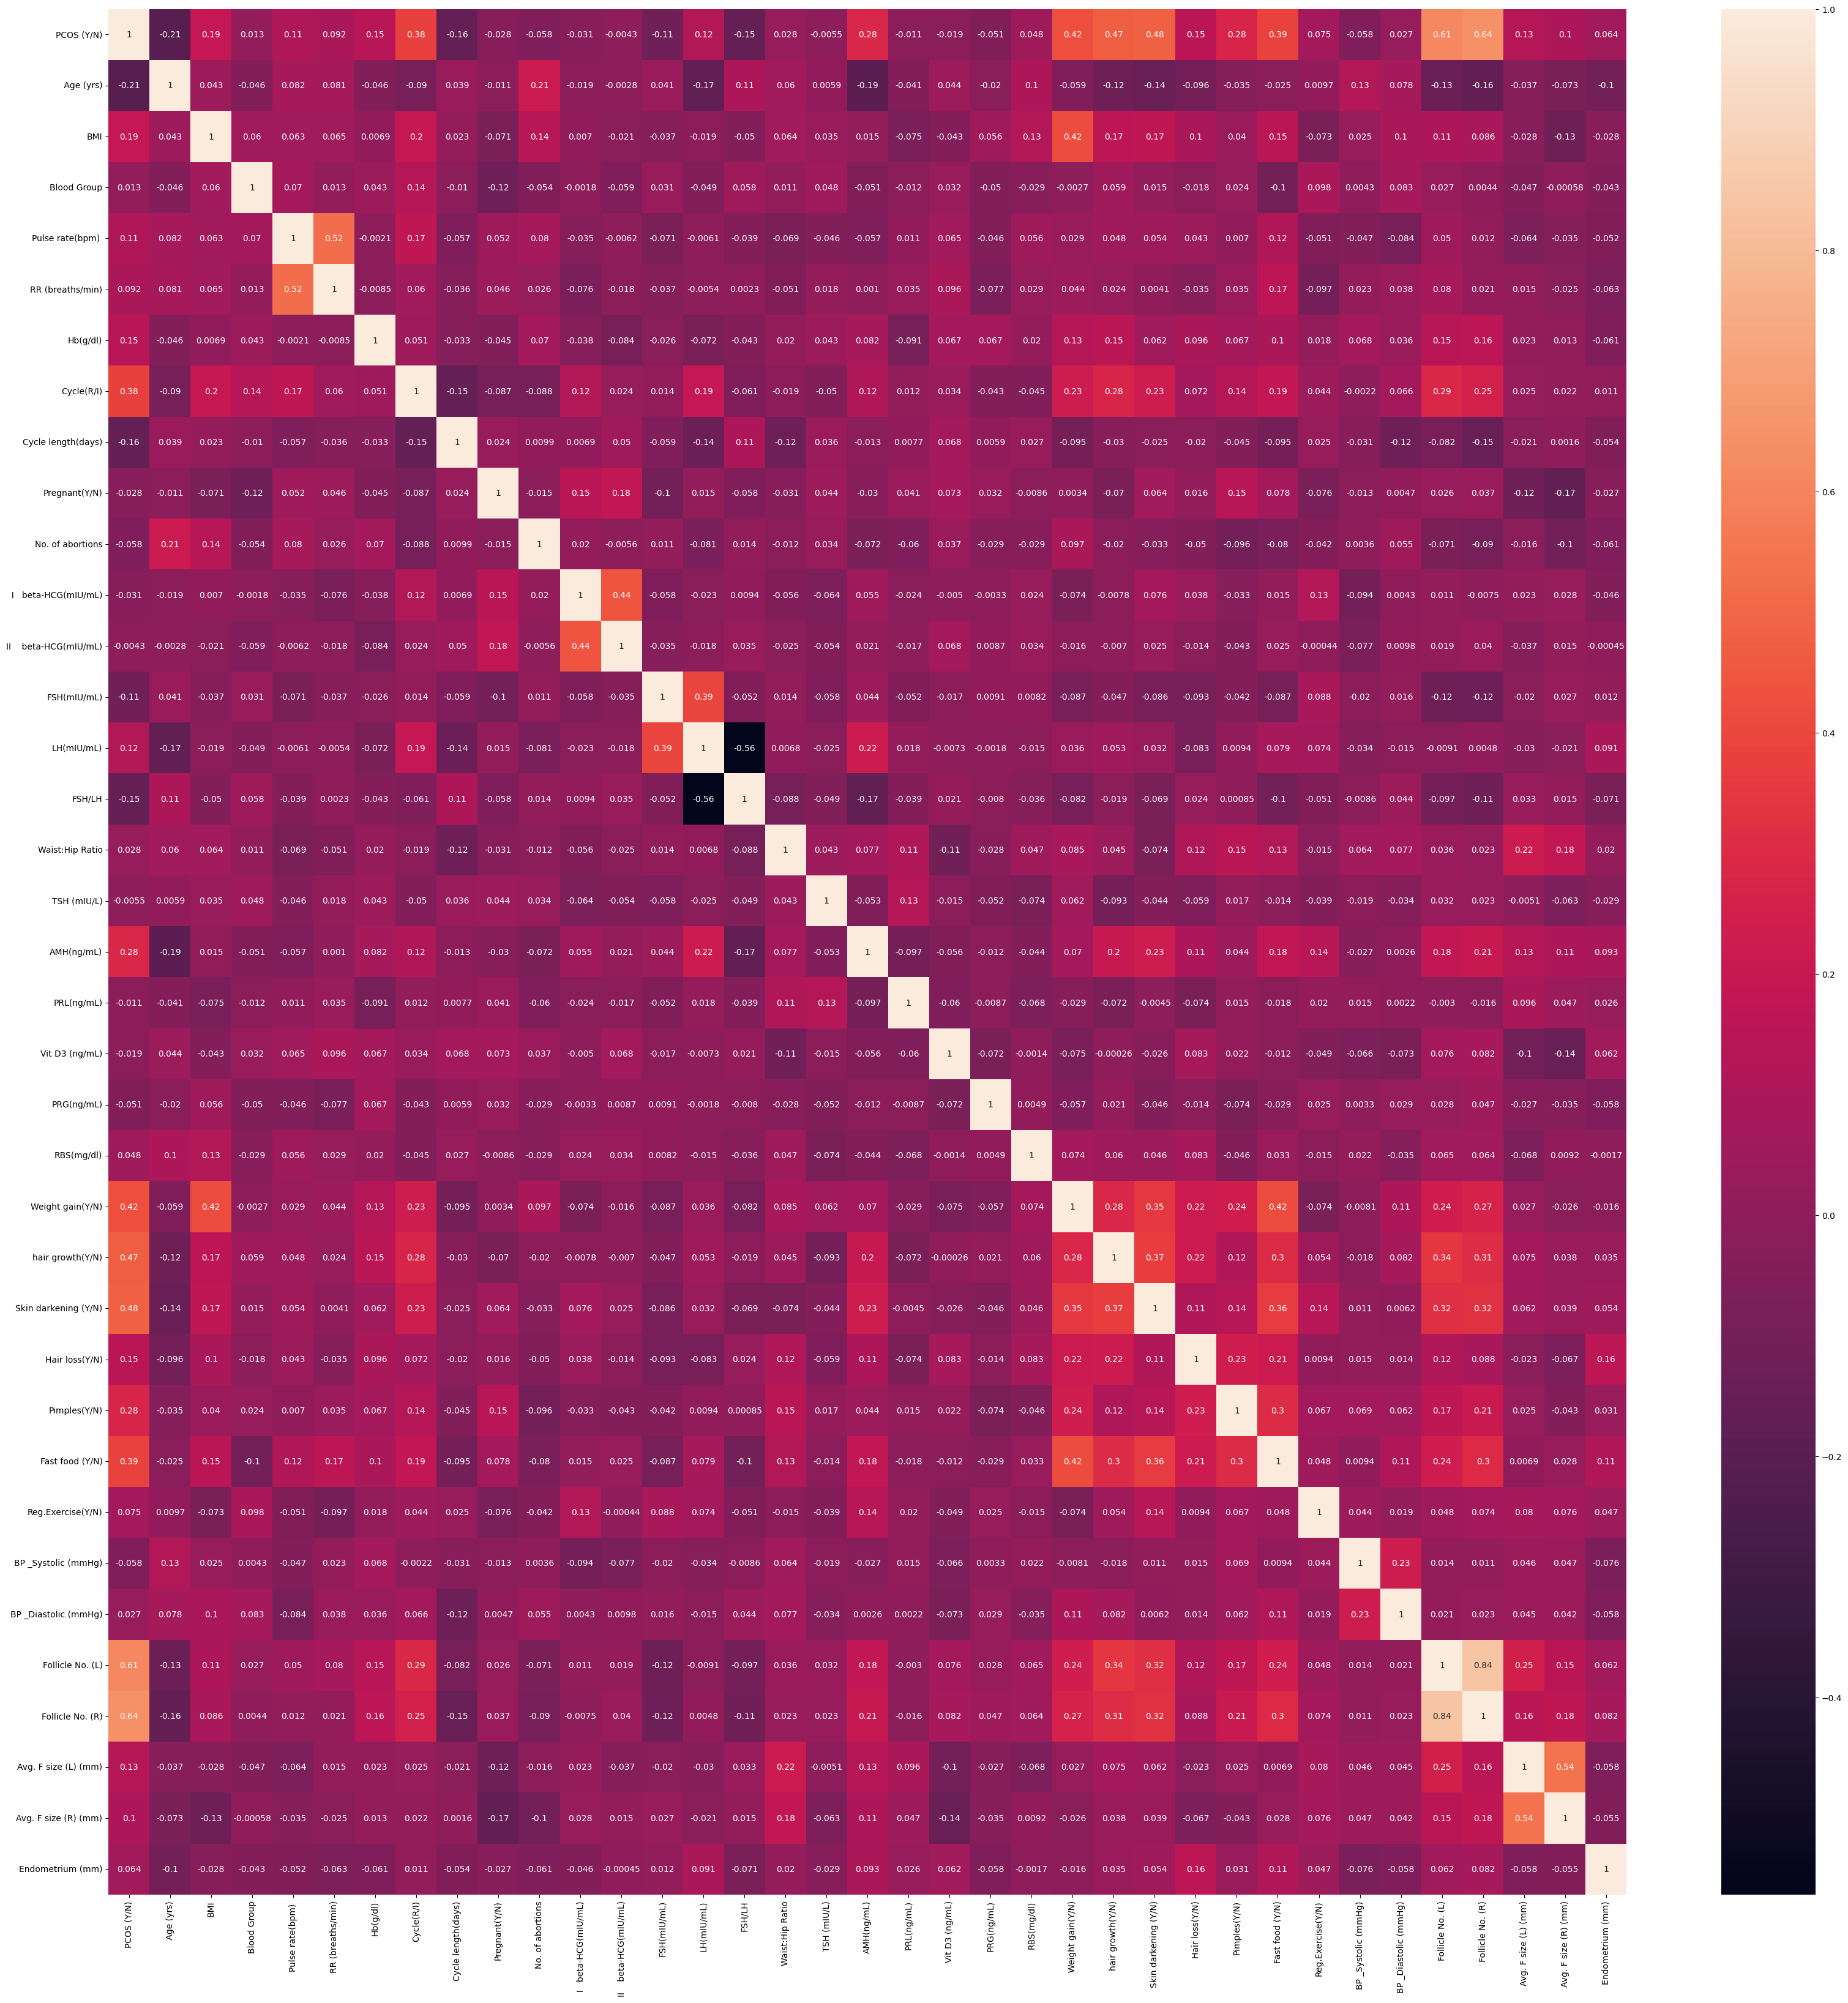

In [24]:
plt.figure(figsize = (40,40))
sns.heatmap(Cleaned_Dataset.corr(), annot=True)   # it's a 37x37 correlation matrix,

## **Splitting Dataset**

In [105]:
Dataset = Cleaned_Dataset.dropna()
X=Dataset.iloc[:,1:].values # Independent variables
Y=Dataset.iloc[:,0].values # Target variable

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [107]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### **Implementing ANN**

In [108]:
ann_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
ann_model.build(input_shape=(1,36))
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (1, 16)                   592       
                                                                 
 dense_3 (Dense)             (1, 1)                    17        
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
ann_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
ann_model.fit(X_train,Y_train,epochs=70,batch_size=32)
Model_Name=[]
Accuracy_Model=[]

Epoch 1/70
46/46 [==============================] - 1s 5ms/step - loss: 0.6220 - accuracy: 0.6968
Epoch 2/70
46/46 [==============================] - 0s 3ms/step - loss: 0.4627 - accuracy: 0.7749
Epoch 3/70
46/46 [==============================] - 0s 5ms/step - loss: 0.3676 - accuracy: 0.8384
Epoch 4/70
46/46 [==============================] - 0s 4ms/step - loss: 0.3026 - accuracy: 0.8812
Epoch 5/70
46/46 [==============================] - 0s 4ms/step - loss: 0.2586 - accuracy: 0.9026
Epoch 6/70
46/46 [==============================] - 0s 4ms/step - loss: 0.2300 - accuracy: 0.9116
Epoch 7/70
46/46 [==============================] - 0s 4ms/step - loss: 0.2093 - accuracy: 0.9233
Epoch 8/70
46/46 [==============================] - 0s 4ms/step - loss: 0.1940 - accuracy: 0.9296
Epoch 9/70
46/46 [==============================] - 0s 3ms/step - loss: 0.1813 - accuracy: 0.9372
Epoch 10/70
46/46 [==============================] - 0s 2ms/step - loss: 0.1710 - accuracy: 0.9392
Epoch 11/70
46/46 [

12/12 [==============================] - 0s 5ms/step - loss: 0.0514 - accuracy: 0.9890
Loss: 0.05142787843942642
Accuracy: 0.9889807105064392
12/12 [==============================] - 0s 3ms/step


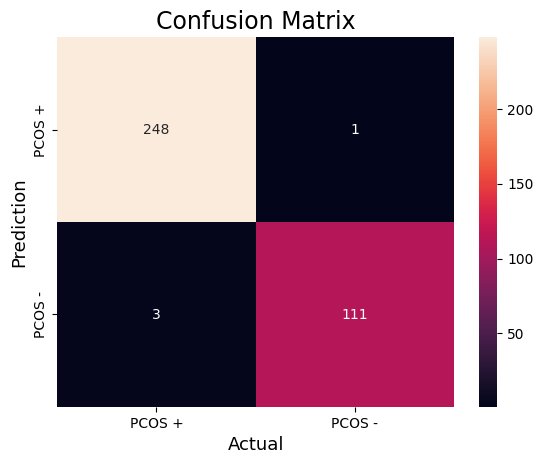

In [110]:
loss, accuracy = ann_model.evaluate(X_test, Y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)
predicted=ann_model.predict(X_test)
predicted = [1 if x > 0.5 else 0 for x in predicted.flatten()]
cm = confusion_matrix(Y_test,predicted)
sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['PCOS +','PCOS -'],
			yticklabels=['PCOS +','PCOS -'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


Model_Name.append('ANN')
Accuracy_Model.append(accuracy)

pickle.dump(ann_model, open("ANN_Model.sav", 'wb'))

# **Implementing SVM**

In [111]:
kernel_Name=[ 'linear', 'sigmoid', 'rbf', 'poly']
Differ_Kernel_Accuracy=[]

for Kernel in kernel_Name:
  classifier=SVC(kernel=Kernel)
  classifier.fit(X_train,Y_train)
  predicted=classifier.predict(X_test)
  Differ_Kernel_Accuracy.append(accuracy_score(Y_test,predicted))

In [112]:
SVM_Accuracy = pd.DataFrame({'Kernel USed': kernel_Name, 'Accuracy': Differ_Kernel_Accuracy})
print(SVM_Accuracy.to_string())

  Kernel USed  Accuracy
0      linear  0.906336
1     sigmoid  0.853994
2         rbf  0.964187
3        poly  0.955923


SVM gives Max accuracy of  0.9641873278236914  with kernel  rbf 



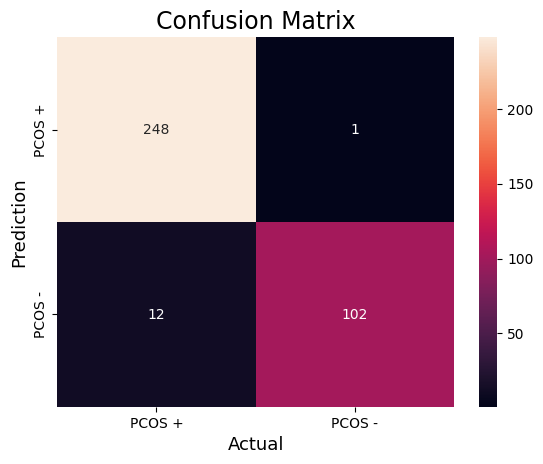

In [113]:
print("SVM gives Max accuracy of ",max(Differ_Kernel_Accuracy)," with kernel ",kernel_Name[np.array(Differ_Kernel_Accuracy).argmax()],"\n")
SVM_Model=SVC(kernel=kernel_Name[np.array(Differ_Kernel_Accuracy).argmax()])
SVM_Model.fit(X_train, Y_train)
predicted=SVM_Model.predict(X_test)
cm = confusion_matrix(Y_test, predicted)
sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['PCOS +','PCOS -'],
			yticklabels=['PCOS +','PCOS -'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


Model_Name.append('SVM')
Accuracy_Model.append(max(Differ_Kernel_Accuracy))

pickle.dump(SVM_Model, open("SVM_Model.sav", 'wb'))

# **Implementing Naive Bayes Classifier**

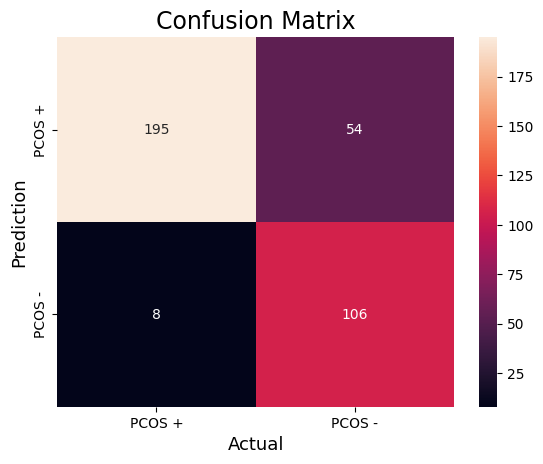

Accuracy :  0.8292011019283747


In [114]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)

y_pred = gnb_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm,
			annot = True,
			fmt='g',
			xticklabels=['PCOS +','PCOS -'],
			yticklabels=['PCOS +','PCOS -'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy : ', accuracy)

Model_Name.append('Naive Bayes')
Accuracy_Model.append(accuracy)

pickle.dump(gnb_model, open("NBC_Model.sav", 'wb'))

# **Implementing the Decision Tree Model**

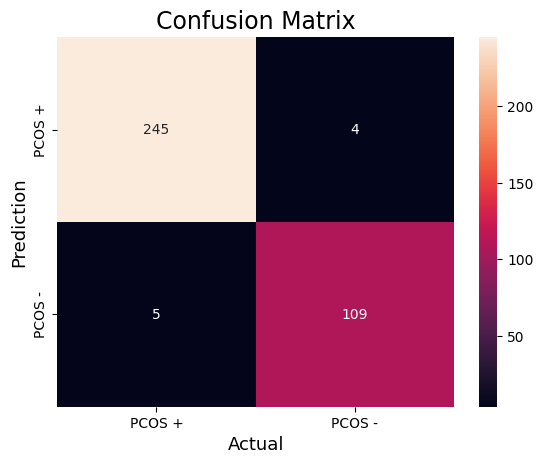

Accuracy :  0.9752066115702479


In [115]:
DT_Model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_Model.fit(X_train, Y_train)

y_pred = DT_Model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm,
			annot = True,
			fmt='g',
			xticklabels=['PCOS +','PCOS -'],
			yticklabels=['PCOS +','PCOS -'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy : ', accuracy)

Model_Name.append('Decision Tree')
Accuracy_Model.append(accuracy)
pickle.dump(DT_Model, open("DT_Model.sav", 'wb'))

# **Implementing Random Forest Model**

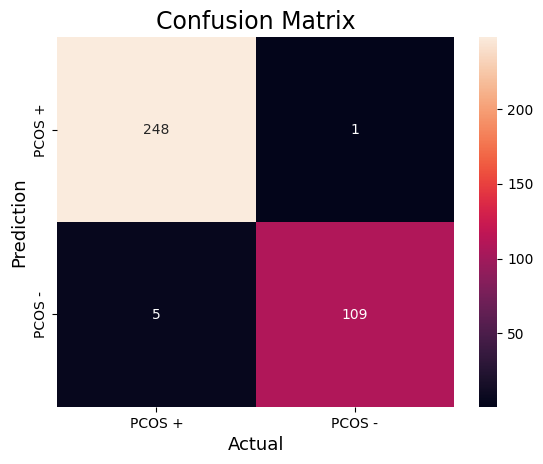

Accuracy :  0.9834710743801653


In [116]:
RF_model = RandomForestClassifier(n_estimators = 10, criterion = "entropy")
RF_model.fit(X_train, Y_train)

y_pred = RF_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm,
			annot = True,
			fmt='g',
			xticklabels=['PCOS +','PCOS -'],
			yticklabels=['PCOS +','PCOS -'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy : ', accuracy)


Model_Name.append('Random Forest')
Accuracy_Model.append(accuracy)

pickle.dump(RF_model, open("RF_model.sav", 'wb'))

In [117]:
Models = pd.DataFrame({'Model Name': Model_Name, 'Accuracy': Accuracy_Model})
print(Models.to_string())

      Model Name  Accuracy
0            ANN  0.988981
1            SVM  0.964187
2    Naive Bayes  0.829201
3  Decision Tree  0.975207
4  Random Forest  0.983471


In [119]:
# shutil.rmtree('/content/Models')

In [120]:
os.mkdir('/content/Models')
shutil.copy('/content/ANN_Model.sav','/content/Models/ANN_Model.sav')
shutil.copy('/content/DT_Model.sav','/content/Models/DT_Model.sav')
shutil.copy('/content/NBC_Model.sav','/content/Models/NBC_Model.sav')
shutil.copy('/content/RF_model.sav','/content/Models/RF_Model.sav')
shutil.copy('/content/SVM_Model.sav','/content/Models/SVM_Model.sav')

'/content/Models/SVM_Model.sav'

In [121]:
shutil.copytree('/content/Models','/content/drive/MyDrive/PCOS/Models')

'/content/drive/MyDrive/PCOS/Models'

In [122]:
#Loading Models
ANN_Model = pickle.load(open('/content/Models/ANN_Model.sav', 'rb'))
DT_Model = pickle.load(open('/content/Models/DT_Model.sav', 'rb'))
NBC_Model = pickle.load(open('/content/Models/NBC_Model.sav', 'rb'))
RF_Model = pickle.load(open('/content/Models/RF_Model.sav', 'rb'))
SVM_Model = pickle.load(open('/content/Models/SVM_Model.sav', 'rb'))


**Taking top 3 Models,i.e. Random Forest, ANN, Decision Tree**

12/12 [==============================] - 0s 3ms/step


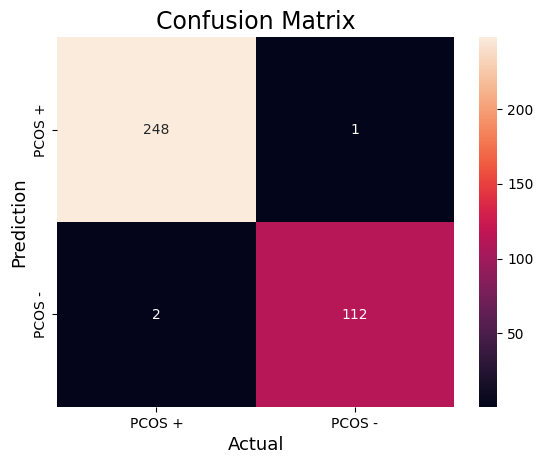

Accuracy of Voting Model is :  0.9917355371900827


In [123]:
#Implementing Voting
Ann_Predicted=ann_model.predict(X_test)
Ann_Predicted = [1 if x > 0.5 else 0 for x in Ann_Predicted.flatten()]

RF_Predicted = RF_model.predict(X_test)
DT_predicted= DT_Model.predict(X_test)
hybrid_Pred=[]
for i in range(len(Ann_Predicted)):
  prediction=[]
  prediction.append(Ann_Predicted[i])
  prediction.append(RF_Predicted[i])
  prediction.append(DT_predicted[i])
  hybrid_Pred.append(max(set(prediction), key=prediction.count))

cm = confusion_matrix(Y_test, hybrid_Pred)
sns.heatmap(cm,
			annot = True,
			fmt='g',
			xticklabels=['PCOS +','PCOS -'],
			yticklabels=['PCOS +','PCOS -'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

accuracy = accuracy_score(hybrid_Pred, Y_test)
print('Accuracy of Voting Model is : ', accuracy)

46/46 [==============================] - 0s 2ms/step
Coefficients:  [0.40975913 0.29512044 0.29512044]


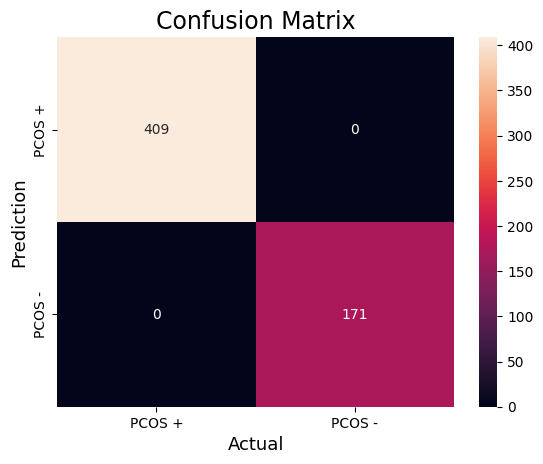

Accuracy of linear Regression Model is :  1.0


In [126]:
#Implementing Stacked Generalization

Dataset = Cleaned_Dataset.dropna()
X=Dataset.iloc[:,1:].values
Y=Dataset.iloc[:,0].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
sc=StandardScaler()
X_temp=sc.fit_transform(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)


Ann_Predicted=ann_model.predict(X_train)
Ann_Predicted = [1 if x > 0.5 else 0 for x in Ann_Predicted.flatten()]

RF_Predicted = RF_model.predict(X_train)
DT_Predicted= DT_Model.predict(X_train)

#Creating Dataset for meta Model
Stacked_Dataset = pd.DataFrame({'Result': Y_train,'ANN': Ann_Predicted, 'RF': RF_Predicted, 'DT': DT_Predicted})
X = np.hstack([Stacked_Dataset.iloc[:,1:].values])
Y=Stacked_Dataset.iloc[:,0].values
x_train, x_test,y_train, y_test = train_test_split(X, Y,test_size=0.4,random_state=1)
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
print('Coefficients: ', reg.coef_)

y_pred=reg.predict(x_test)
y_pred = [1 if x > 0.5 else 0 for x in y_pred.flatten()]
#Meta Model Accuracy
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
			annot = True,
			fmt='g',
			xticklabels=['PCOS +','PCOS -'],
			yticklabels=['PCOS +','PCOS -'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy of linear Regression Model is : ', accuracy)

12/12 [==============================] - 0s 3ms/step


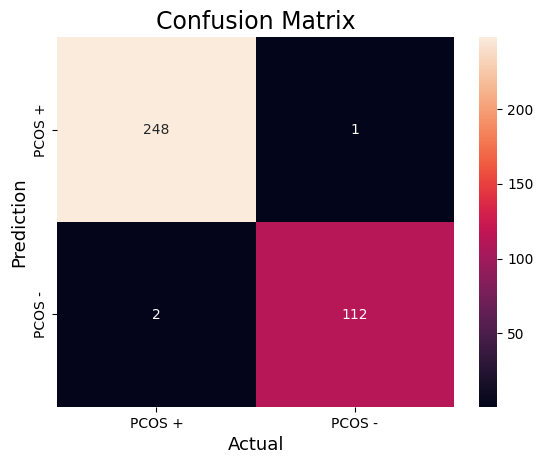

Accuracy of Stacked Generalization Model is :  0.9917355371900827


In [127]:
Ann_Predicted=ann_model.predict(X_test)
Ann_Predicted = [1 if x > 0.5 else 0 for x in Ann_Predicted.flatten()]

RF_Predicted = RF_model.predict(X_test)
DT_Predicted= DT_Model.predict(X_test)
Stacked_Dataset = pd.DataFrame({'Result': Y_test,'ANN': Ann_Predicted, 'RF': RF_Predicted, 'DT': DT_Predicted})
X = np.hstack([Stacked_Dataset.iloc[:,1:].values])
Y=Stacked_Dataset.iloc[:,0].values


Y_Pred=reg.predict(X)
Y_Pred = [1 if x > 0.5 else 0 for x in Y_Pred.flatten()]
#Meta Model Accuracy
cm = confusion_matrix(Y_test, Y_Pred)
sns.heatmap(cm,
			annot = True,
			fmt='g',
			xticklabels=['PCOS +','PCOS -'],
			yticklabels=['PCOS +','PCOS -'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()
accuracy = accuracy_score(Y_Pred, Y_test)
print('Accuracy of Stacked Generalization Model is : ', accuracy)